---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv("fraud_data.csv")

In [49]:
#df.Class.value_counts()
(np.bincount(df.Class)/len(df.Class))[1]

0.016410823768035772

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [50]:
def answer_one():
    
    # Your code here
    
    return (np.bincount(df.Class)/len(df.Class))[1]


In [51]:
answer_one()

0.016410823768035772

In [52]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)



dummy_majority.score(X_test, y_test)

recall_score(y_test, y_dummy_predictions)

0.0

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [54]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)



    accuracy_score = dummy_majority.score(X_test, y_test)

    recall_score = recall_score(y_test, y_dummy_predictions)
    
    result = (accuracy_score, recall_score)
    
    return result

In [55]:
answer_two()

(0.98525073746312686, 0.0)

In [56]:
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svcc = SVC().fit(X_train, y_train)
    y_svc_predictions = svcc.predict(X_test)



    accuracy_score = svcc.score(X_test, y_test)

    recall_score = recall_score(y_test, y_svc_predictions)
    precision_score = precision_score(y_test, y_svc_predictions)
    
    precision_score

1.0

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [45]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svcc = SVC().fit(X_train, y_train)
    y_svc_predictions = svcc.predict(X_test)



    accuracy_score = svcc.score(X_test, y_test)

    recall_score = recall_score(y_test, y_svc_predictions)
    
    precision_score = precision_score(y_test, y_svc_predictions)
    
    result = (accuracy_score, recall_score, precision_score)
    
    return result

In [46]:
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [89]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svm = SVC(gamma=1e-07, C=1e9).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    y_thres = pd.Series(y_score_svm).apply(lambda x: 1 if x>-220 else 0)
    output = confusion_matrix(y_test, y_thres)
    
    return output

In [90]:
answer_four()

array([[5320,   24],
       [  14,   66]])

In [121]:
# %matplotlib notebook
# import matplotlib.pyplot as plt

# from sklearn.metrics import precision_recall_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# lr = LogisticRegression().fit(X_train, y_train)
# # lr.predict(X_test)

# y_proba_lr = lr.predict_proba(X_test)

# y_score_list = list(zip(y_test, y_proba_lr[:,1]))

In [118]:
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr[:,1])

In [119]:
# precision

array([ 0.02456248,  0.0242629 ,  0.02427035, ...,  1.        ,
        1.        ,  1.        ])

<IPython.core.display.Javascript object>


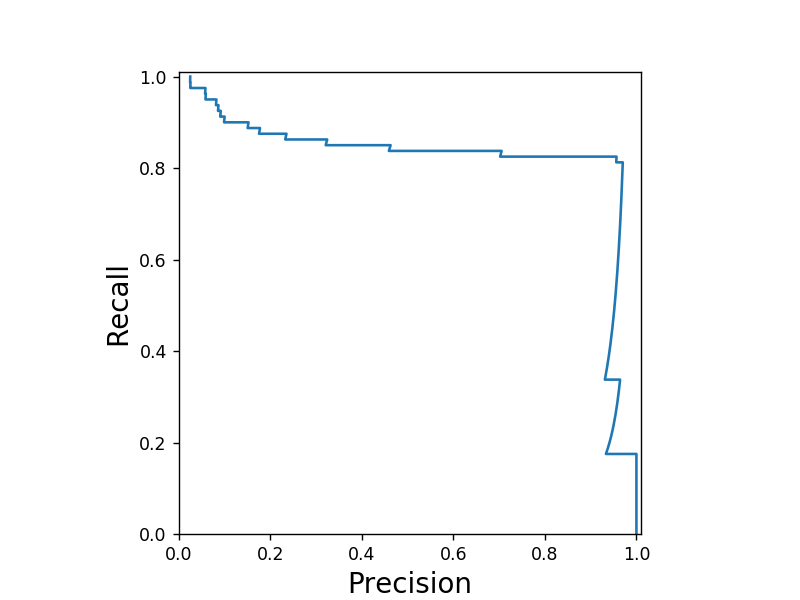

In [120]:
# plt.figure()
# plt.xlim([0.0, 1.01])
# plt.ylim([0.0, 1.01])
# plt.plot(precision, recall, label='Precision-Recall Curve')
# plt.xlabel('Precision', fontsize=16)
# plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
# plt.show()

In [122]:
# fpr_lr, tpr_lr, _ = roc_curve(y_test,y_proba_lr[:,1])
# roc_auc_lr = auc(fpr_lr, tpr_lr)

<IPython.core.display.Javascript object>


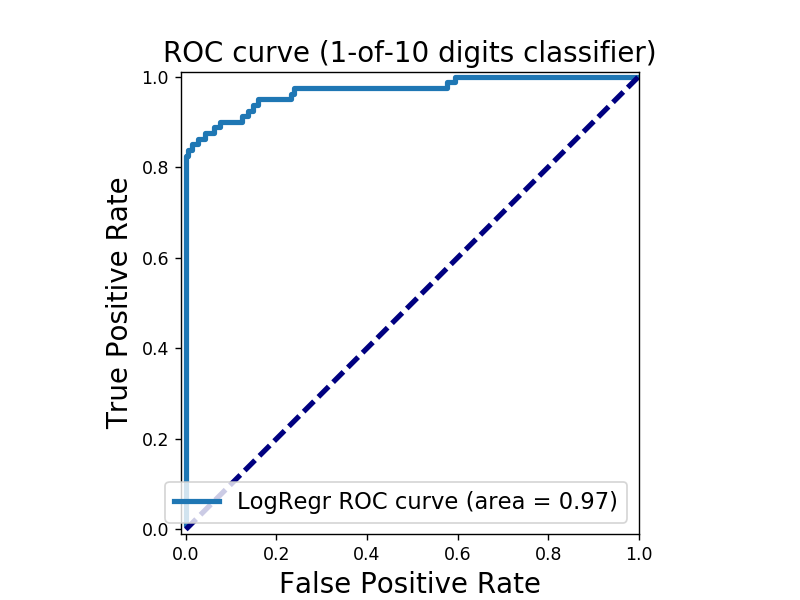

In [124]:
# plt.figure()
# plt.xlim([-0.01, 1.00])
# plt.ylim([-0.01, 1.01])
# plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
# plt.legend(loc='lower right', fontsize=13)
# plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
# plt.show()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [125]:
def answer_five():
        
    output = (0.82 , 0.95)
    
    return output

In [169]:
grid = {'penalty': ['l1', 'l2'],
'C':[0.01, 0.1, 1, 10, 100]}

In [181]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

In [171]:
grid 

{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [172]:
from sklearn.model_selection import GridSearchCV
grid_clf_acc = GridSearchCV(m, param_grid = grid)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
GridSearchCV

In [188]:
np.array(grid_clf_acc.cv_results_.get('mean_test_score')).reshape(5,2)

array([[ 0.99422214,  0.99539001],
       [ 0.99606614,  0.99618907],
       [ 0.99606614,  0.9961276 ],
       [ 0.99588174,  0.9959432 ],
       [ 0.99588174,  0.99588174]])

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [196]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    grid = {'C':[0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'] }
    
    grid_clf_acc = GridSearchCV(m, param_grid = grid, scoring = 'recall')
    grid_clf_acc.fit(X_train, y_train)
    res = grid_clf_acc.cv_results_.get('mean_test_score')
    



    # Your code here
    
    return np.array(grid_clf_acc.cv_results_.get('mean_test_score')).reshape(5,2)

In [197]:
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

In [193]:
grid_clf_acc.cv_results_['mean_test_score']

array([ 0.99422214,  0.99539001,  0.99606614,  0.99618907,  0.99606614,
        0.9961276 ,  0.99588174,  0.9959432 ,  0.99588174,  0.99588174])

In [194]:
grid_clf_acc.cv_results_.get('mean_test_score')

array([ 0.99422214,  0.99539001,  0.99606614,  0.99618907,  0.99606614,
        0.9961276 ,  0.99588174,  0.9959432 ,  0.99588174,  0.99588174])

<IPython.core.display.Javascript object>


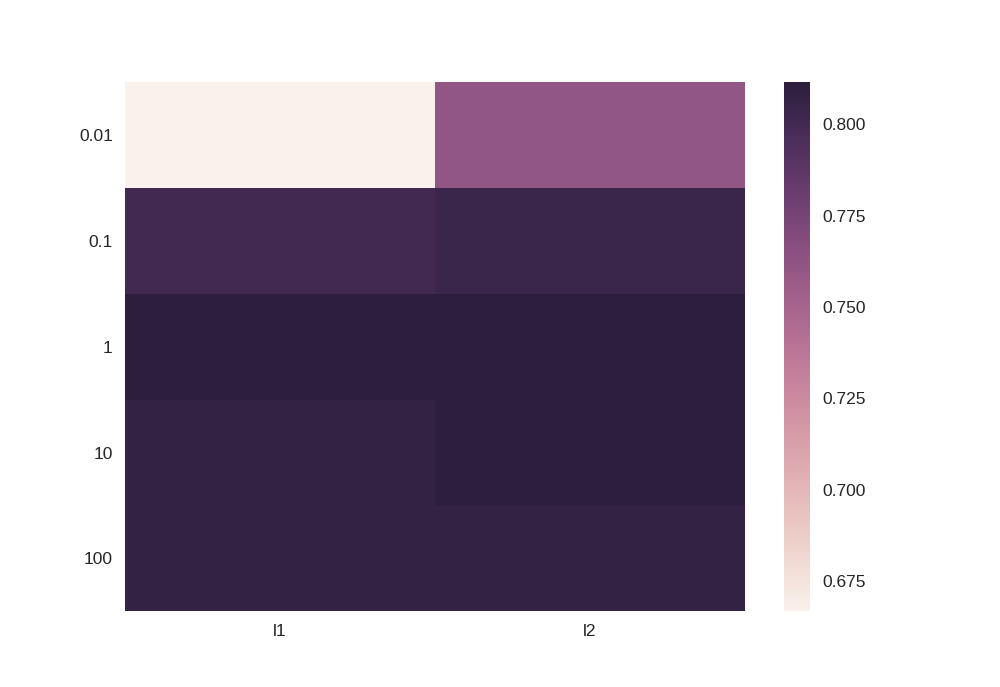

In [198]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

# GridSearch_Heatmap(answer_six())